In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import glob
import sys
import itertools

[sys.path.append(f) for f in glob.glob('utils/*')]
from preprocess import DataStruct, daysBetween
from plotting_utils import figSize
from lineplots import plotsd, comparisonScatterPlot
from recalibration_utils import *
from session_utils import *


### **Checked sessions**

In [ ]:
sessions_check             = dict()

# note bad days:
sessions_check['bad_days'] = ['t5.2018.01.17', 't5.2018.01.19', 't5.2018.01.22', 't5.2018.01.24',
                              't5.2018.07.02', 't5.2018.07.06', 't5.2018.08.06', 't5.2018.08.08', 
                              't5.2019.01.23', 't5.2016.12.15', 't5.2016.12.21', 't5.2016.10.05', 
                              't5.2017.07.31', 't5.2019.03.20']

# for good days, store session ID and acceptable blocks in key-value pairs. Days where all blocks
# are acceptable are not included.
sessions_check['t5.2016.09.28'] = [16, 19, 22, 24, 25, 29, 35]
sessions_check['t5.2016.10.03'] = [10, 27, 29, 30, 31]
sessions_check['t5.2016.10.07'] = [14, 15, 16, 17, 18]
sessions_check['t5.2016.10.10'] = [14, 15, 16, 17, 20, 21, 22, 24, 26, 28, 29, 30]
sessions_check['t5.2019.01.09'] = [14, 15, 16, 17]
sessions_check['t5.2019.01.14'] = [27, 28, 29]
sessions_check['t5.2019.01.16'] = [19, 21, 22, 23]
sessions_check['t5.2019.01.30'] = [12, 14, 16, 18]
sessions_check['t5.2019.03.27'] = [11, 18, 20, 22, 25, 27, 29]
sessions_check['t5.2019.04.03'] = [12, 14, 16]

In [ ]:
import numpy as np
np.save('misc_data/OldSessions_check.npy', sessions_check)


## Bad sessions:

**D:/T5_ClosedLoop\\t5.2016.12.15.mat** - TOSS: early days and no imagery session notes for blocks

**D:/T5_ClosedLoop\\t5.2016.12.21.mat** - TOSS: early days and no imagery session notes for blocks

**D:/T5_ClosedLoop\\t5.2016.10.05.mat** - TOSS; all chalkboard imagery 

**D:/T5_ClosedLoop\\t5.2017.07.31.mat** - TOSS; dual cursor day

**D:/T5_ClosedLoop\\t5.2019.03.20.mat** - TOSS: "reach and point"

And these: 
['D:/T5_ClosedLoop\\t5.2018.01.17.mat', 'D:/T5_ClosedLoop\\t5.2018.01.19.mat', 'D:/T5_ClosedLoop\\t5.2018.01.22.mat', 'D:/T5_ClosedLoop\\t5.2018.01.24.mat',
               'D:/T5_ClosedLoop\\t5.2018.07.02.mat', 'D:/T5_ClosedLoop\\t5.2018.07.06.mat', 'D:/T5_ClosedLoop\\t5.2018.08.06.mat', 'D:/T5_ClosedLoop\\t5.2018.08.08.mat', 
               'D:/T5_ClosedLoop\\t5.2019.01.23.mat']


## Good sessions:

**D:/T5_ClosedLoop\\t5.2016.09.26.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2016.09.28.mat** - KEEP: 16, 19, 22, 24, 25, 29, 35 (trackball and joystick imagery are very similar neurally)

**D:/T5_ClosedLoop\\t5.2016.10.03.mat** - KEEP: 10, 27, 29, 30, 31 (again, trackball and joystick appear very similar here - combining below for all sessions)

**D:/T5_ClosedLoop\\t5.2016.10.07.mat** - KEEP: 14, 15, 16, 17, 18

**D:/T5_ClosedLoop\\t5.2016.10.10.mat** - KEEP: 14, 15, 16, 17, 20, 21, 22, 24, 26, 28, 29, 30

**D:/T5_ClosedLoop\\t5.2016.10.12.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2016.10.13.mat** - KEEP: all blocks 

**D:/T5_ClosedLoop\\t5.2016.10.24.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2016.10.26.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2016.10.31.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2018.07.02.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2018.07.06.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2018.07.11.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2018.07.25.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2018.08.06.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2018.08.08.mat** - KEEP: all blocks (haptic feedback day)

**D:/T5_ClosedLoop\\t5.2017.08.07.mat** - KEEP: all blocks (presumably all same imagery...? using "rollerball" at start)

**D:/T5_ClosedLoop\\t5.2018.12.17.mat** - KEEP: all blocks (using "ball" imagery; speaking during arm iBCI is kk @ sergey paper) 

**D:/T5_ClosedLoop\\t5.2018.12.19.mat** - KEEP: all blocks

**D:/T5_ClosedLoop\\t5.2019.01.09.mat** - KEEP: 14, 15, 16, 17

**D:/T5_ClosedLoop\\t5.2019.01.14.mat** - KEEP: 27, 28, 29

**D:/T5_ClosedLoop\\t5.2019.01.16.mat** - KEEP: 19, 21, 22, 23 (used magic for 3, 5 trials in blocks 22 and 23 but mostly right joystick) 

**D:/T5_ClosedLoop\\t5.2019.01.23.mat** - KEEP: all blocks (speech day, but blocks are standard cursor control) 

**D:/T5_ClosedLoop\\t5.2019.01.30.mat** - (??) KEEP: 12, 14, 16, 18

**D:/T5_ClosedLoop\\t5.2019.03.27.mat** - KEEP: 11, 18, 20, 22, 25, 27, 29

**D:/T5_ClosedLoop\\t5.2019.04.03.mat** - KEEP: 12, 14, 16 (non-magic blocks)

**D:/T5_ClosedLoop\\t5.2019.04.08.mat** - KEEP: all blocks (no imagery mentioned?)

**D:/T5_ClosedLoop\\t5.2019.06.19.mat** - KEEP: all blocks (no imagery mentioned?)

**D:/T5_ClosedLoop\\t5.2019.07.01.mat** - KEEP: all blocks (no imagery mentioned?)

**D:/T5_ClosedLoop\\t5.2019.11.27.mat** - KEEP: all blocks (no imagery mentioned?)

**D:/T5_ClosedLoop\\t5.2019.12.09.mat** - KEEP: all blocks (no imagery mentioned?)



In [ ]:
file    = 'D:/T5_ClosedLoop\\t5.2019.01.16.mat'
    
session = DataStruct(file)
print('Blocks: ', session.blockList)
print('Tasks: ', session.gameName)

## Check if block subselection improves overall decoder readout

In [47]:
min_nblocks    = 3
max_ndays      = 14
filelist       = glob.glob('D:/T5_ClosedLoop/historical/*')
sessions_check = np.load('misc_data/OldSessions_check.npy', allow_pickle = True).item()

files          = get_Sessions(filelist, min_nblocks,  manually_remove = sessions_check['bad_days'])
init_pairs     = get_SessionPairs(files, max_ndays = max_ndays)
n_files        = len(files)

pairs, scores1 = get_StrongTransferPairs(init_pairs, min_R2 = -1 * np.inf, train_size = 0.67, sigma = 2, block_constraints = None)
pairs, scores2 = get_StrongTransferPairs(init_pairs, min_R2 = -1 * np.inf, train_size = 0.67, sigma = 2, block_constraints = sessions_check)
diffs = [daysBetween(pairs[i][0].split('t5.')[1].split('.mat')[0], pairs[i][1].split('t5.')[1].split('.mat')[0]) for i in range(len(pairs))]

Text(0, 0.5, 'Subselected blocks R^2')

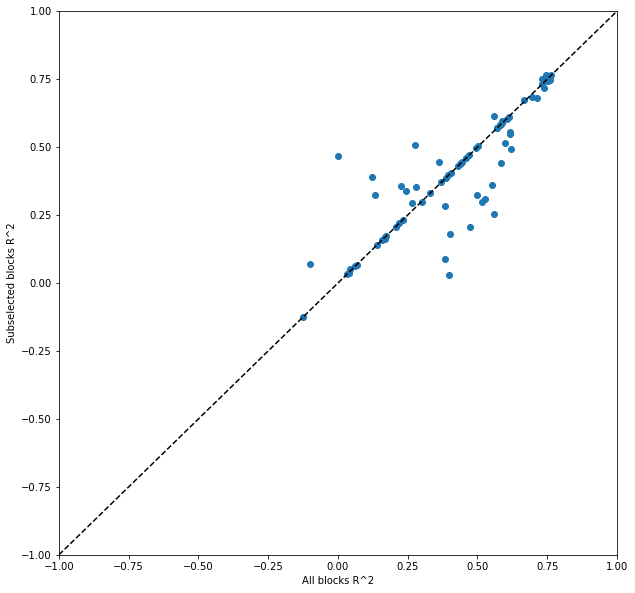

In [48]:
comparisonScatterPlot(scores1, scores2, figsize= 10, xy_lims= [-1,1])
plt.xlabel('All blocks R^2')
plt.ylabel('Subselected blocks R^2')

Text(0, 0.5, 'Correlation')

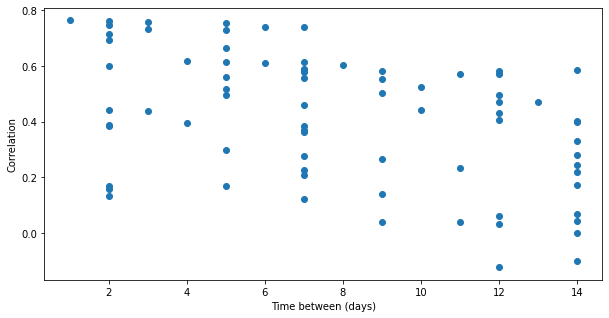

In [57]:
figSize(5, 10)
plt.scatter(diffs, scores1)
plt.xlabel('Time between (days)')
plt.ylabel('Correlation')

In [52]:
pairs[0][0].split('t5.')[1].split('.mat')[0]

'2016.09.26'

In [ ]:
figSize(10, 20)
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(pairs)), scores1)
plt.ylim([-1, 1])
plt.axhline(0, linestyle = '--', color = 'k')

plt.subplot(1, 2, 2)
bad_sessions   = np.concatenate([pairs[i] for i in np.where(scores1 < 0.1)[0]])
unique, counts = np.unique(bad_sessions, return_counts = True)
plt.bar(np.arange(len(unique)), counts)

## Check whether imagery shows strong tuning differences 

In [ ]:
session = DataStruct('D:/T5_ClosedLoop\\t5.2016.10.03.mat')

print(session.blockList)
print(session.gameName)

In [ ]:

imageries               = dict()

imageries['type'] = ['Chalk', 'Trackball', 'Joystick']
imageries[0]      = [14, 15]
imageries[1]      = [27, 29, 30, 31]
imageries[2]      = [10]


In [ ]:
from sklearn.linear_model import LinearRegression

figSize(10, 10)

scores_matrix = np.zeros((3, 3))
n_imageries   = len(imageries['type'])

for i in range(n_imageries):
    im1_trainX, im1_testX, im1_trainY, im1_testY = getTrainTest(session, train_frac = 0.5, blocks= imageries[i])
    for j in range(n_imageries):
        im2_trainX, im2_testX, im2_trainY, im2_testY = getTrainTest(session, train_frac = 0.5, blocks= imageries[j])
        lm = LinearRegression(fit_intercept= False, normalize = False)
        lm.fit(im1_trainX - im1_trainX.mean(axis = 0), im1_trainY)

        scores_matrix[i, j] = lm.score(im2_testX - im1_trainX.mean(axis = 0), im2_testY)

        
plt.imshow(scores_matrix)
plt.colorbar()
plt.xticks(np.arange(n_imageries), imageries['type'])
plt.yticks(np.arange(n_imageries), imageries['type'])
plt.title('Test set performance (R^2)', fontweight = 'bold')
plt.xlabel('Test condition', fontweight = 'bold')
plt.ylabel('Train condition', fontweight = 'bold')

for i in range(n_imageries):
    for j in range(n_imageries):
        plt.text(i - 0.1, j, np.round(scores_matrix[i, j], 3), fontweight = 'bold')
